# Loading and cleaning data

Load packages

In [3]:
options(stringsAsFactors=F);
suppressPackageStartupMessages(library(umap))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(MASS))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(colorRamps))
suppressPackageStartupMessages(library(vioplot))
suppressPackageStartupMessages(library(gplots))

Load data (change the location in this to match wherever you have the 'measurements_Cells.csv' file saved)

In [4]:
dat = read.csv('~/Desktop/protist_movement/movement_data/chlamydomonas/microchamber_vs_384_galo_pub_data/measurements_Cells.csv')

Add unique id column (to be able to grab individual tracks as a function of sample, hour, well and object ID)

In [6]:
dat$id = paste(dat$Metadata_Sample, dat$Metadata_hour, dat$Metadata_Well, dat$TrackObjects_Label_10, sep = '_')

Spit data into unique tracks

In [7]:
tracks = split(dat, dat$id)

# Comparing movement variables

## Integrated distance

Extract total distance travelled per track

distance = unlist(lapply(tracks, function(x) x$TrackObjects_IntegratedDistance_10[nrow(x)]))

Combine into 384 vs microchamber

In [9]:
distance = split(distance, unlist(lapply(strsplit(names(distance), "_"), function(v){v[1]})))

Compare statistically with Kruskal-Wallis test

In [25]:
k = kruskal.test(distance)
print(k)


	Kruskal-Wallis rank sum test

data:  distance
Kruskal-Wallis chi-squared = 1198.9, df = 1, p-value < 2.2e-16



Compare means

In [11]:
lapply(distance, function(x) mean(x))

$`384`
[1] 19.34775

$micro
[1] 25.59502

Plot

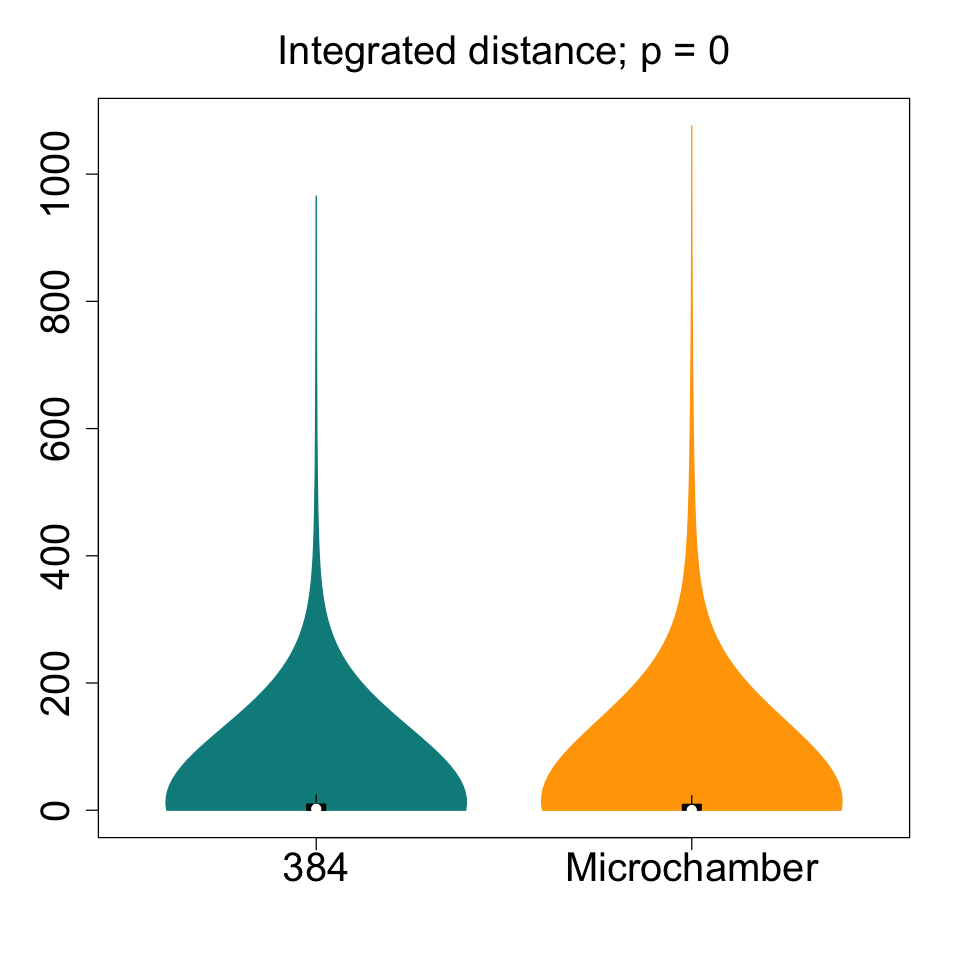

In [58]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(distance[[1]], 
                 distance[[2]],
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Integrated distance;', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

## Distance travelled

Extract distance travelled

In [27]:
trav = unlist(lapply(tracks, function(x) x$TrackObjects_DistanceTraveled_10))

Combine into 384 vs. microchamber

In [28]:
trav = split(trav, unlist(lapply(strsplit(names(trav), "_"), function(v){v[1]})))

Compare with Kruskal-Wallis test

In [30]:
k = kruskal.test(trav)
print(k)


	Kruskal-Wallis rank sum test

data:  trav
Kruskal-Wallis chi-squared = 31604, df = 1, p-value < 2.2e-16



Compare means

In [31]:
lapply(trav, function(x) mean(x))

$`384`
[1] 1.225786

$micro
[1] 1.410823

Plot

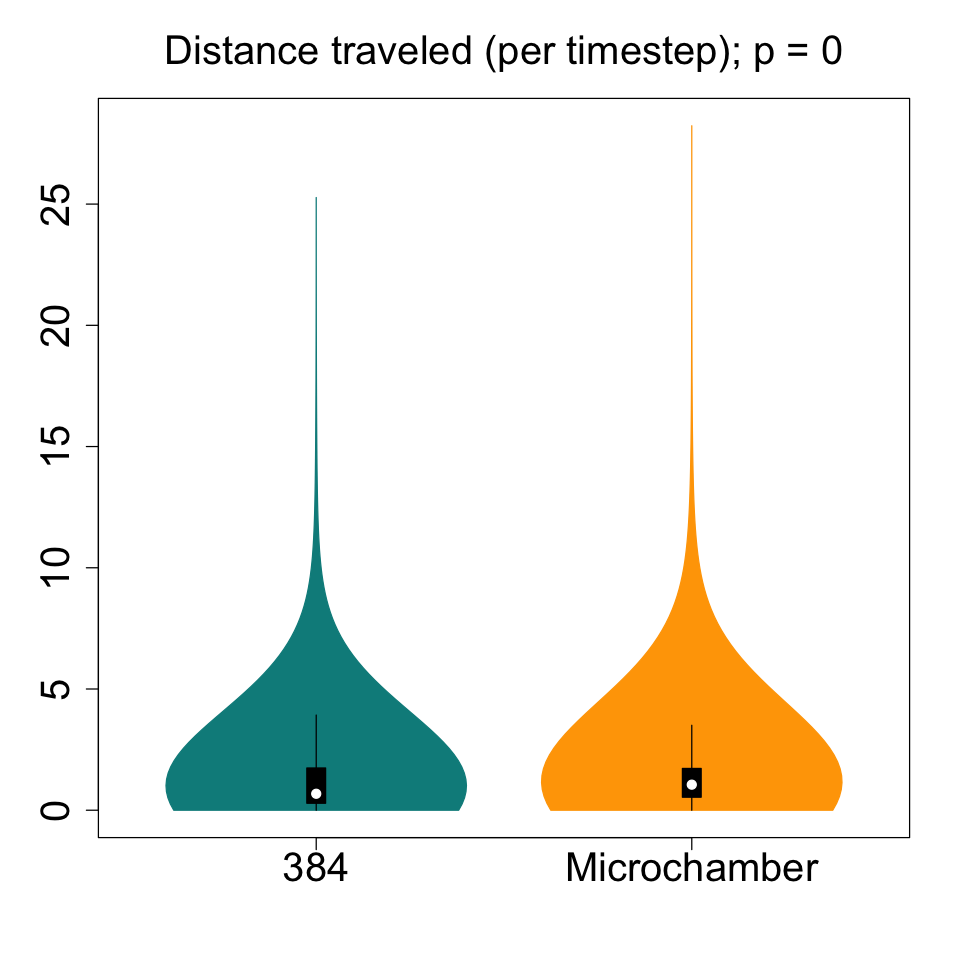

In [57]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(trav[[1]], 
                 trav[[2]],
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Distance traveled (per timestep);', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

## Linearity

Extract linearity

In [42]:
lin = unlist(lapply(tracks, function(x) x$TrackObjects_Linearity_10))

Combine into 384 vs. microchamber

In [43]:
lin = split(lin, unlist(lapply(strsplit(names(lin), "_"), function(v){v[1]})))

Compare with kruskal-wallis test

In [46]:
k = kruskal.test(lin)
print(k)


	Kruskal-Wallis rank sum test

data:  lin
Kruskal-Wallis chi-squared = 137538, df = 1, p-value < 2.2e-16



Compare means

In [45]:
lapply(lin, function(x) mean(x, na.rm = TRUE))

$`384`
[1] 0.4222936

$micro
[1] 0.5959036

Plot

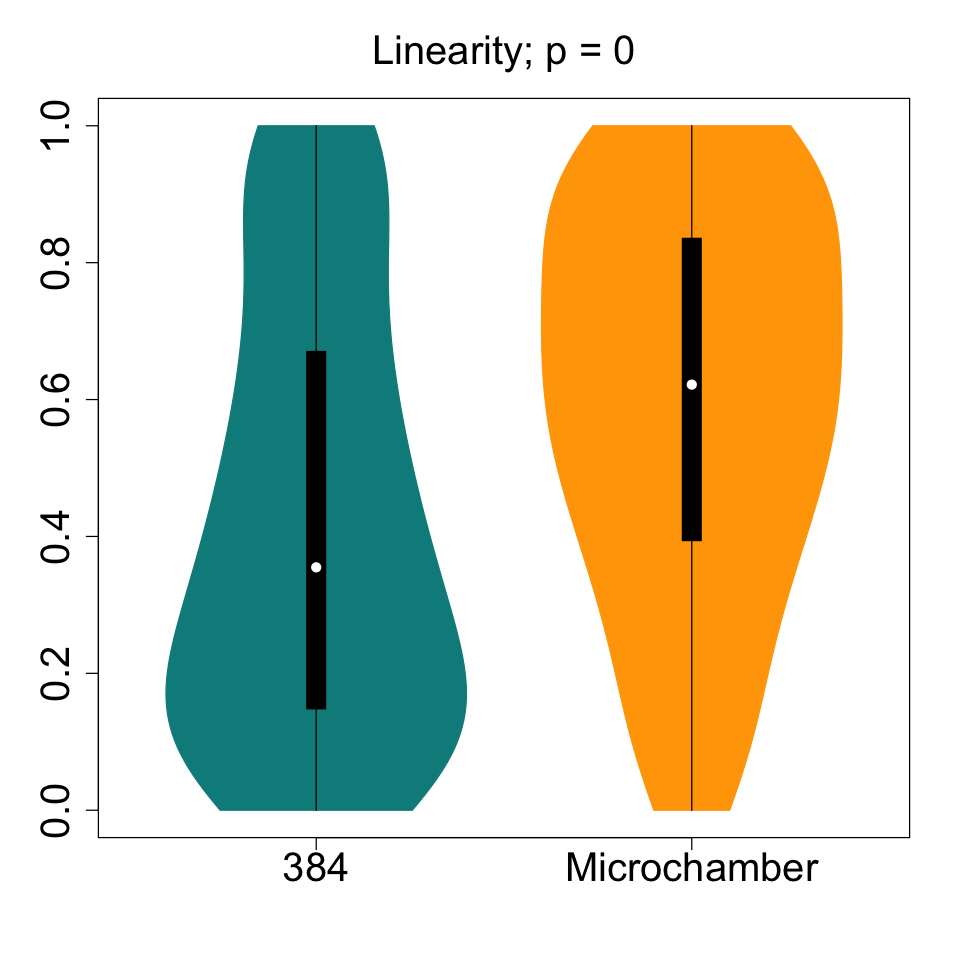

In [55]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(na.omit(lin[[1]]), 
                 na.omit(lin[[2]]),
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Linearity;', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)

## Lifetime

Extract lifetime

In [49]:
life = unlist(lapply(tracks, function(x) x$TrackObjects_Lifetime_10[nrow(x)]))

Combine into 384 vs. microchamber

In [50]:
life = split(life, unlist(lapply(strsplit(names(life), "_"), function(v){v[1]})))

Compare with kruskal-wallis test

In [52]:
k = kruskal.test(life)
print(k)


	Kruskal-Wallis rank sum test

data:  life
Kruskal-Wallis chi-squared = 3360.2, df = 1, p-value < 2.2e-16



Compare means

In [53]:
lapply(life, function(x) mean(x, na.rm = TRUE))

$`384`
[1] 17.76246

$micro
[1] 20.12285

Plot

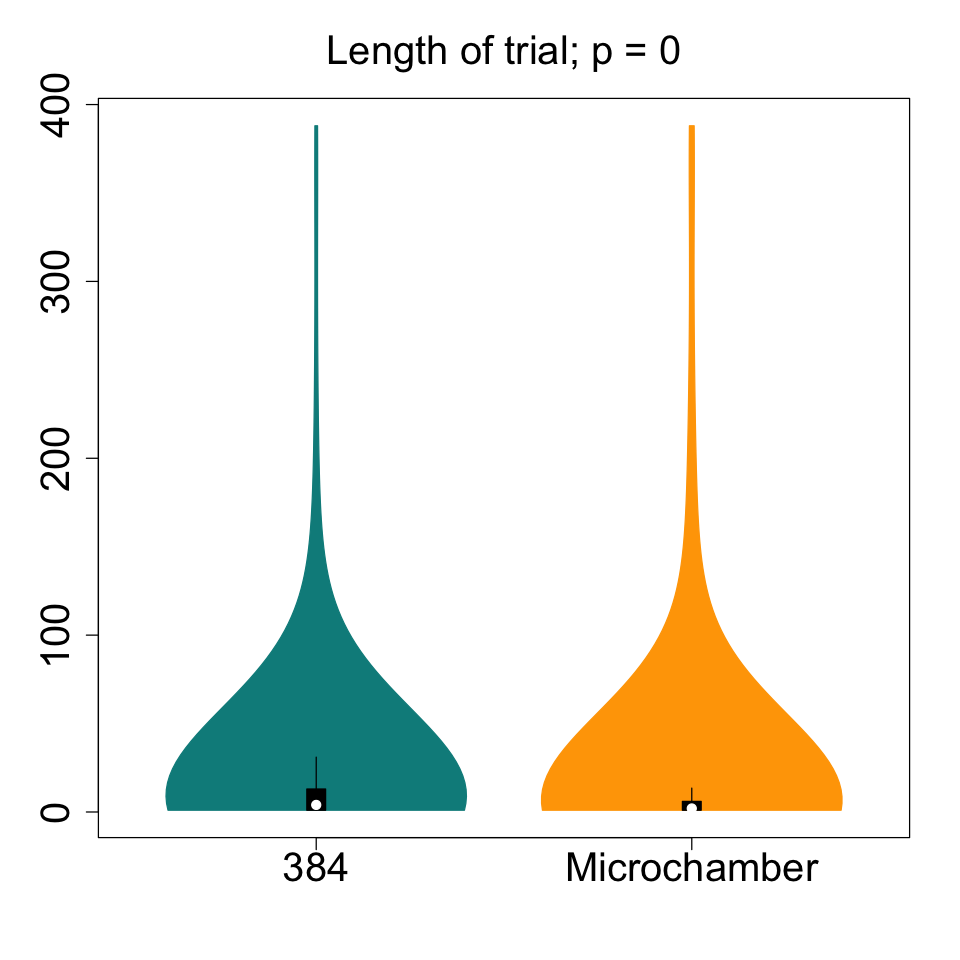

In [56]:
#Set up plot
options(repr.plot.width=8, repr.plot.height=8)

#Set up colors
cols = c('cyan4', 'orange')

#Plot
vioplot::vioplot(life[[1]], 
                 life[[2]],
                 names = c('384', 'Microchamber'),
                 col = cols,
                 border = cols,
                 cex.lab = 2, 
                 cex.axis = 2, 
                 cex.names = 2)
title(main = paste('Length of trial;', 'p =', signif(k$p.value, 3)),
     font.main = 1,
     cex.main = 2)